# Importando base de dados

In [1]:
import pandas as pd

In [2]:
gorjetas = pd.read_csv('tips.csv')

In [3]:
gorjetas

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução

In [4]:
gorjetas.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia',
    'time':'tempo',
    'size':'tamanho'
}

In [6]:
gorjetas = gorjetas.rename(columns = renomear)

In [7]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
gorjetas.tempo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
sim_nao = {
    'No':'N',
    'Yes':'S'
}
dias = {
    'Sun':'Dom',
    'Sat':'Sab', 
    'Thur':'Qui', 
    'Fri':'Sex'
}
tempos = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.dia = gorjetas.dia.map(dias)
gorjetas.tempo = gorjetas.tempo.map(tempos)

In [13]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho
0,16.99,1.01,N,Dom,Jantar,2
1,10.34,1.66,N,Dom,Jantar,3
2,21.01,3.50,N,Dom,Jantar,3
3,23.68,3.31,N,Dom,Jantar,2
4,24.59,3.61,N,Dom,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,N,Sab,Jantar,3
240,27.18,2.00,S,Sab,Jantar,2
241,22.67,2.00,S,Sab,Jantar,2
242,17.82,1.75,N,Sab,Jantar,2


# Importando o Seaborn

In [14]:
import seaborn as sns

In [15]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\nathan gurgel\anaconda3\lib\site-packages
Requires: matplotlib, pandas, scipy, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [16]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'tempo', 'tamanho'], dtype='object')

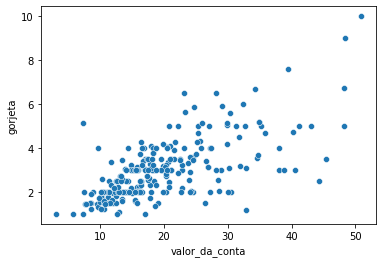

In [17]:
grafico_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta com o valor da conta**

In [18]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta    244
gorjeta           244
sobremesa         244
dia               244
tempo             244
tamanho           244
dtype: int64

## Criando o campo porcetagem

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho
0,16.99,1.01,N,Dom,Jantar,2
1,10.34,1.66,N,Dom,Jantar,3
2,21.01,3.50,N,Dom,Jantar,3
3,23.68,3.31,N,Dom,Jantar,2
4,24.59,3.61,N,Dom,Jantar,4


In [20]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [21]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [22]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho,porcentagem
0,16.99,1.01,N,Dom,Jantar,2,0.06
1,10.34,1.66,N,Dom,Jantar,3,0.16
2,21.01,3.50,N,Dom,Jantar,3,0.17
3,23.68,3.31,N,Dom,Jantar,2,0.14
4,24.59,3.61,N,Dom,Jantar,4,0.15


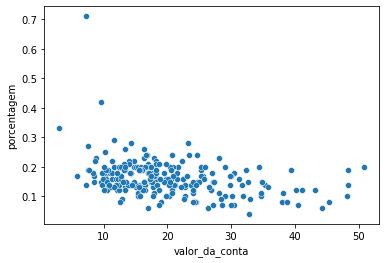

In [23]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

## Criando um campo a mais

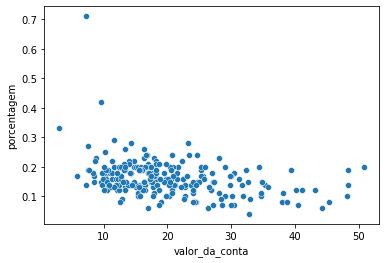

In [24]:
porcentagem_conta_linha = ''
porcentagem_conta_linha = sns.scatterplot(x='valor_da_conta',y='porcentagem',data = gorjetas)

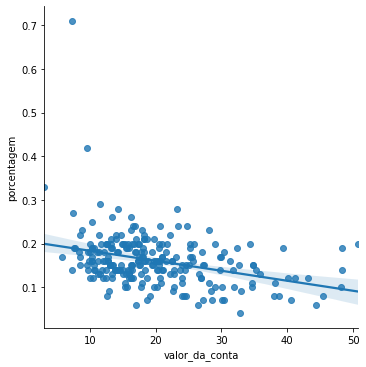

In [25]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [26]:
porcentagem_conta_linha.set_title('Relação da proporção da gorjeta em relação ao valor da conta')
porcentagem_conta_linha.set(xlabel = 'Valor da conta', ylabel = 'Porcentagem da gorjeta')

[Text(0.5, 18.106250000000003, 'Valor da conta'),
 Text(17.200000000000003, 0.5, 'Porcentagem da gorjeta')]

In [27]:
imagem = porcentagem_conta_linha.get_figure()
imagem.savefig('imagem.png')

# Análise 2 - Sobremesa

In [28]:
gorjetas[gorjetas['sobremesa'] == 'S'].describe()

,valor_da_conta,gorjeta,tamanho,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [29]:
gorjetas[gorjetas['sobremesa'] == 'N'].describe()

,valor_da_conta,gorjeta,tamanho,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


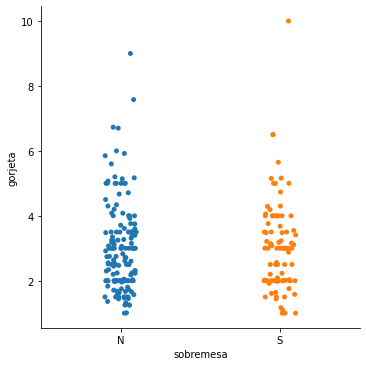

In [32]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

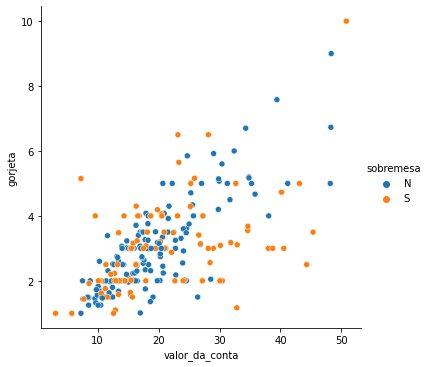

In [35]:
sns.relplot(x='valor_da_conta',y='gorjeta', hue='sobremesa',data=gorjetas)

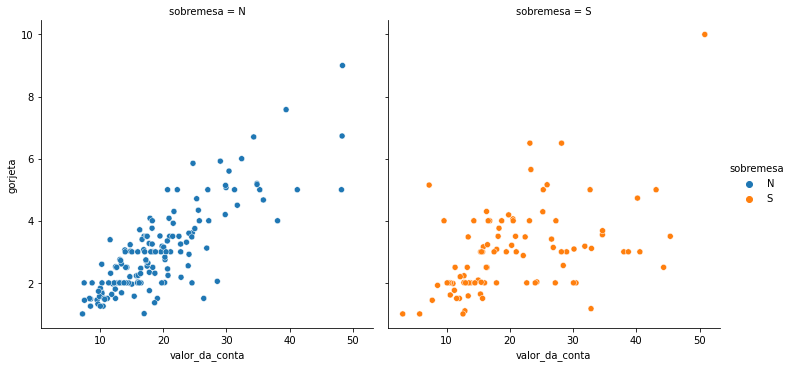

In [36]:
sns.relplot(x='valor_da_conta',y='gorjeta', hue='sobremesa', col='sobremesa',data=gorjetas)

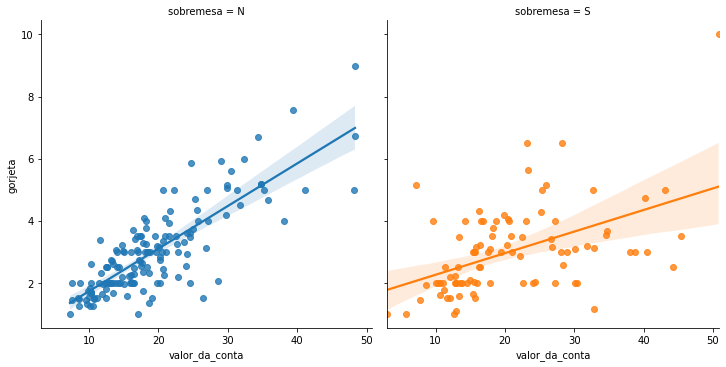

In [38]:
sns.lmplot(x='valor_da_conta', y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

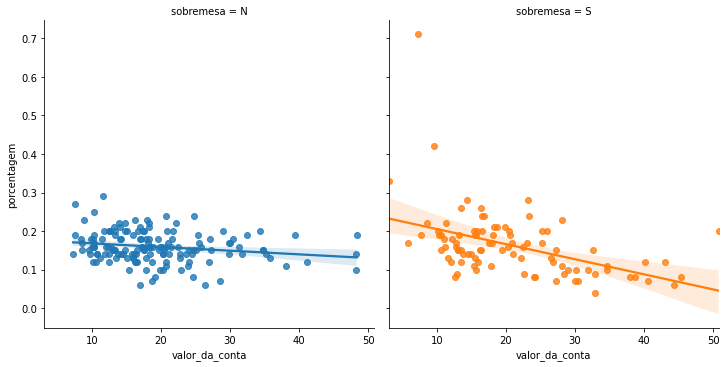

In [39]:
sns.lmplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

# Teste de Hipótese

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [40]:
from scipy.stats import ranksums

In [44]:
sobremesa = gorjetas.query('sobremesa == "S"').porcentagem

In [43]:
sem_sobremesa = gorjetas.query('sobremesa == "N"').porcentagem

In [45]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [53]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho,porcentagem
0,16.99,1.01,N,Dom,Jantar,2,0.06
1,10.34,1.66,N,Dom,Jantar,3,0.16
2,21.01,3.50,N,Dom,Jantar,3,0.17
3,23.68,3.31,N,Dom,Jantar,2,0.14
4,24.59,3.61,N,Dom,Jantar,4,0.15


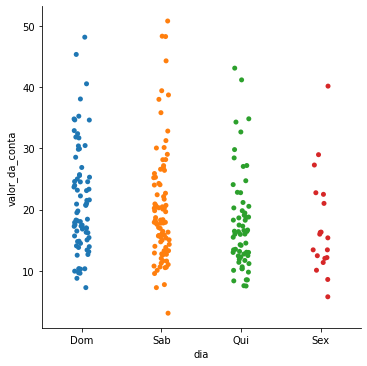

In [54]:
sns.catplot(x='dia', y = 'valor_da_conta',hue='dia',data = gorjetas)

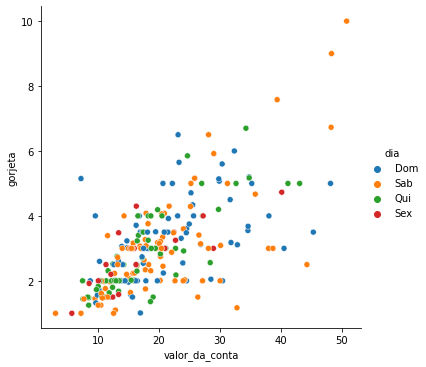

In [55]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia',data=gorjetas)

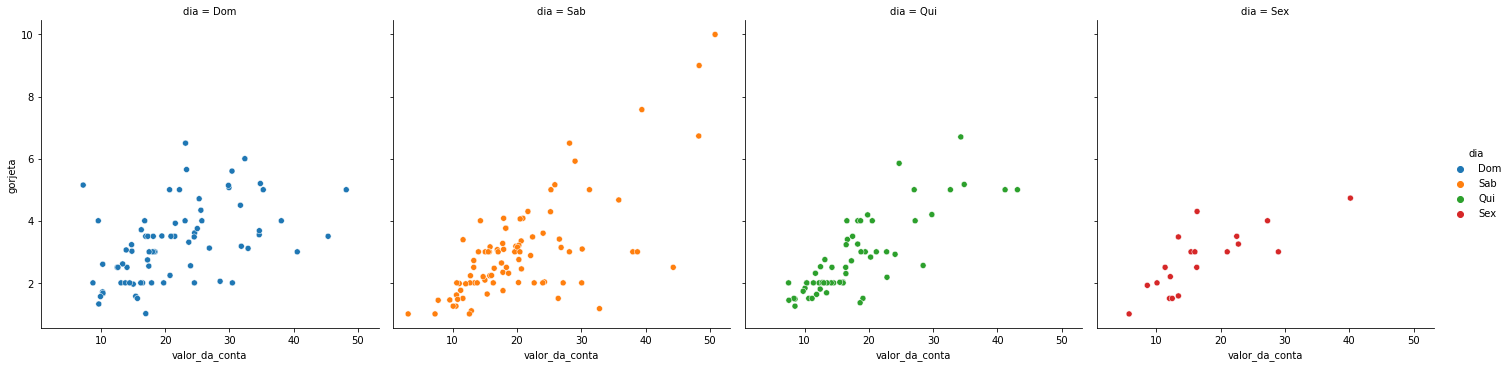

In [56]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia', col='dia',data=gorjetas)

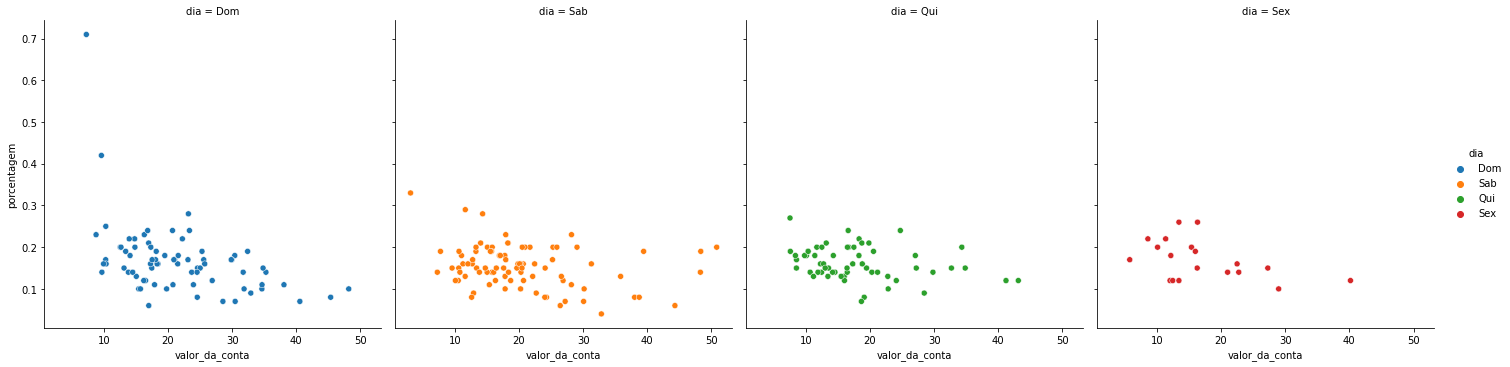

In [57]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia', col='dia',data=gorjetas)

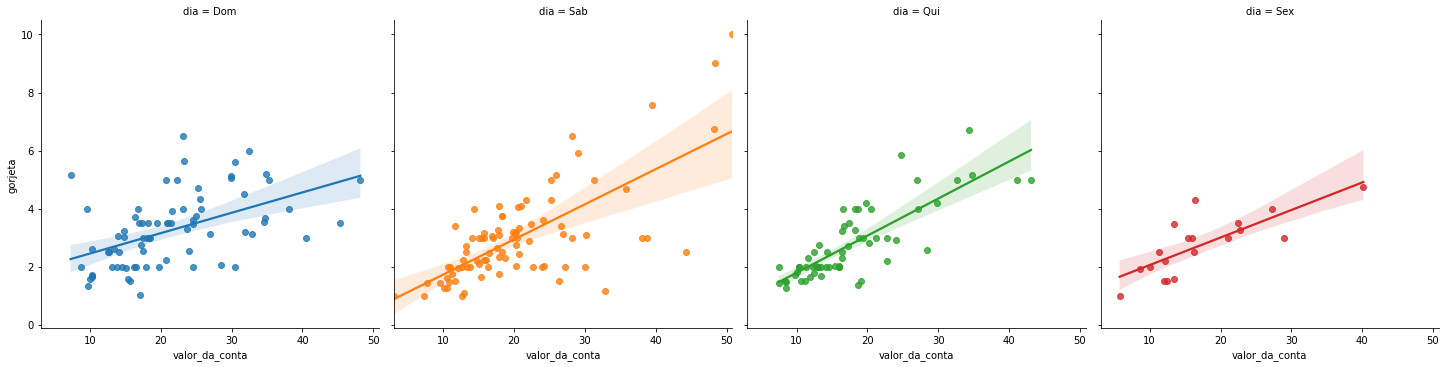

In [58]:
sns.lmplot(x='valor_da_conta',y='gorjeta',hue='dia', col='dia',data=gorjetas)

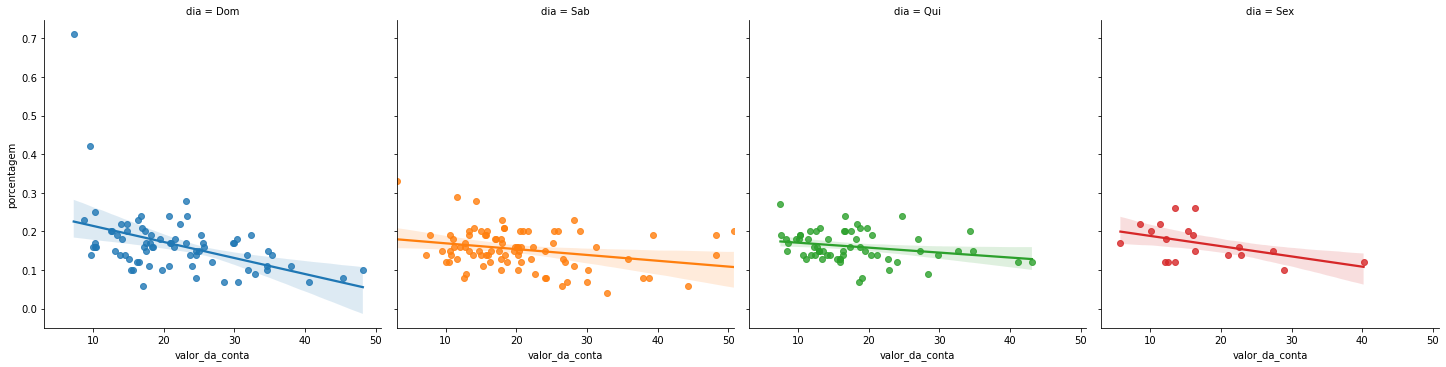

In [59]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia', col='dia',data=gorjetas)

In [60]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [61]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [64]:
gorjetas.groupby(['dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia,,,
Dom,21.410000,3.255132,0.166974
Qui,17.682742,2.771452,0.161129
Sab,20.441379,2.993103,0.153678
Sex,17.151579,2.734737,0.169474


In [66]:
print('Frequência do dias')
gorjetas.dia.value_counts()

Frequência do dias


Sab    87
Dom    76
Qui    62
Sex    19
Name: dia, dtype: int64

## Teste de hipótese

In [70]:
domingo = gorjetas.query('dia == "Dom"').valor_da_conta

In [71]:
sabado = gorjetas.query('dia == "Sab"').valor_da_conta

In [72]:
ranksums(sabado, domingo)

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

# Análise 4 - Hora do dia

In [73]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,tempo,tamanho,porcentagem
0,16.99,1.01,N,Dom,Jantar,2,0.06
1,10.34,1.66,N,Dom,Jantar,3,0.16
2,21.01,3.50,N,Dom,Jantar,3,0.17
3,23.68,3.31,N,Dom,Jantar,2,0.14
4,24.59,3.61,N,Dom,Jantar,4,0.15


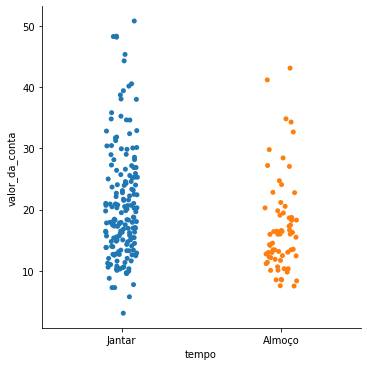

In [77]:
sns.catplot(x='tempo',y='valor_da_conta',hue='tempo',data=gorjetas)

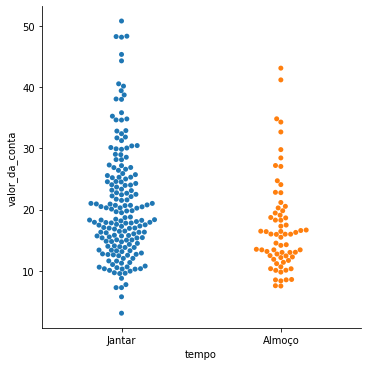

In [78]:
sns.catplot(x='tempo',y='valor_da_conta',hue='tempo',kind='swarm',data=gorjetas)

<AxesSubplot:xlabel='tempo', ylabel='valor_da_conta'>

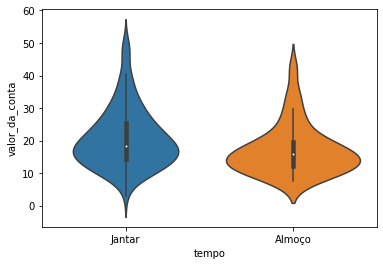

In [80]:
sns.violinplot(x='tempo',y='valor_da_conta',data=gorjetas)

<AxesSubplot:xlabel='tempo', ylabel='valor_da_conta'>

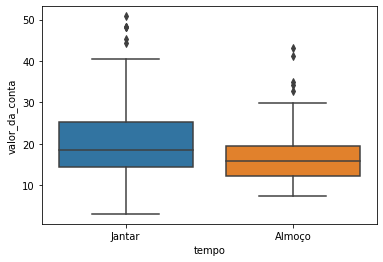

In [81]:
sns.boxplot(x='tempo',y='valor_da_conta',data=gorjetas)

In [82]:
almoco = gorjetas.query("tempo == 'Almoço'").valor_da_conta

In [83]:
jantar = gorjetas.query("tempo == 'Jantar'").valor_da_conta

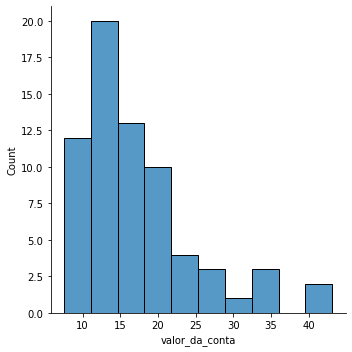

In [85]:
sns.displot(almoco)

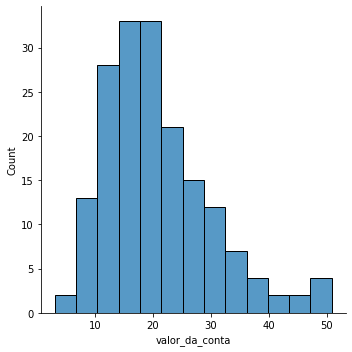

In [86]:
sns.displot(jantar)

In [101]:
gorjetas.groupby(['tempo']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
tempo,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no jantar e no almoço**

In [103]:
r2 = ranksums(jantar,almoco)

In [104]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0011791039723641672


In [113]:
porcent_almoco = gorjetas.query("tempo == 'Almoço'").porcentagem

In [114]:
porcent_jantar = gorjetas.query("tempo == 'Jantar'").porcentagem

In [115]:
ranksums(porcent_almoco, porcent_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)